# Data Science Festival 2020
## Going postal: How to craft a cutting-edge route optimisation engine in-house that suits your business needs

Fabrice Durier - fabrice.durier@royalmail.com 

Hugo Galy - hugo.galy@royalmail.com

Louisa Sober - louisa.sober@royalmail.com


## Background Information

Structure of a postcode EH12 9DN:
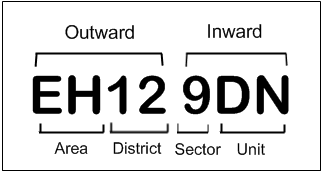

Info on what a delivery office does

## Imports

In [37]:
import pandas as pd
import numpy as np
import folium as f
from folium.features import DivIcon, Choropleth

## Import data

In [22]:
%pwd
postcodes = pd.read_csv("data/143dps_postcodes.csv", index_col=0)
dist_df = pd.read_csv("data/143dps_matrix_distance.csv", index_col=0)
time_df = pd.read_csv("data/143dps_matrix_time.csv", index_col=0)
hub = pd.Series({"postcode": "EH129PB", "latitude": 55.929447, "longitude": -3.302109})

In [20]:
print("Postcodes dataframe")
display(postcodes.head())
print("\n Time dataframe (min)")
display(time_df.head())
print("\n Distance dataframe (Km)")
display(dist_df.head())

Postcodes dataframe


,barcode,postcode,district,latitude,longitude
0,FQ540107410GB,EH88AD,EH8,55.950173,-3.182539
1,TJ605702214GB,EH67PJ,EH6,55.969909,-3.153708
2,FQ430027246GB,EH92JP,EH9,55.935547,-3.181293
3,FQ772601817GB,EH93AX,EH9,55.924977,-3.173193
4,FQ551001349GB,EH177ER,EH17,55.912269,-3.140012



 Time dataframe (min)


,EH129PB,EH88AD,EH67PJ,EH92JP,EH93AX,EH177ER,EH37RN,EH12QP,EH45PZ,EH41NS,...,EH39SR,EH64QY,EH45BP,EH39LT,EH89LW,EH91PL,EH66JJ,EH35AQ,EH89JS,EH65HX
EH129PB,0.000000,21.166667,29.466667,21.466667,19.366667,19.250000,16.116667,19.866667,15.350000,19.000000,...,15.066667,23.283333,12.716667,17.883333,25.866667,21.033333,26.816667,22.133333,24.116667,26.683333
EH88AD,21.966667,0.000000,11.000000,7.450000,9.316667,14.150000,12.200000,5.383333,23.250000,12.166667,...,8.450000,15.433333,20.616667,7.716667,7.933333,4.483333,15.233333,11.600000,7.066667,10.983333
EH67PJ,31.183333,10.816667,0.000000,16.083333,17.933333,19.400000,16.083333,16.033333,19.600000,14.583333,...,17.583333,9.733333,21.233333,18.083333,18.033333,14.600000,6.783333,14.033333,17.166667,4.050000
EH92JP,21.300000,7.483333,16.533333,0.000000,3.783333,10.816667,13.100000,6.016667,23.633333,15.183333,...,9.116667,21.250000,20.983333,4.566667,7.800000,2.583333,20.766667,15.316667,6.050000,16.500000
EH93AX,21.883333,10.166667,18.300000,3.750000,0.000000,7.500000,17.383333,9.066667,27.916667,19.466667,...,13.400000,22.733333,25.266667,8.850000,10.850000,5.633333,22.533333,19.600000,9.100000,18.266667



 Distance dataframe (Km)


,EH129PB,EH88AD,EH67PJ,EH92JP,EH93AX,EH177ER,EH37RN,EH12QP,EH45PZ,EH41NS,...,EH39SR,EH64QY,EH45BP,EH39LT,EH89LW,EH91PL,EH66JJ,EH35AQ,EH89JS,EH65HX
EH129PB,0.000,10.092,31.141,17.477,18.363,19.319,8.089,9.503,9.204,11.023,...,8.104,12.929,7.405,8.975,11.437,10.182,14.131,11.527,10.887,14.107
EH88AD,9.275,0.000,3.603,2.254,3.588,5.823,2.754,1.221,8.958,2.782,...,2.212,4.383,7.159,2.655,1.688,1.375,4.373,2.486,1.458,3.131
EH67PJ,13.284,3.594,0.000,5.852,7.186,9.490,5.147,4.800,9.314,4.817,...,5.453,3.064,9.593,6.658,5.160,4.847,2.772,4.520,4.931,1.299
EH92JP,9.853,2.085,6.023,0.000,1.416,4.331,3.817,1.712,9.636,4.422,...,2.847,5.526,7.837,1.879,1.968,0.663,6.792,4.437,1.418,5.551
EH93AX,19.229,3.615,7.184,1.416,0.000,3.281,5.042,2.870,10.861,5.647,...,4.072,7.963,9.062,3.104,3.126,1.821,7.953,5.662,2.576,6.712


## Initial Exploration

* stats of the dist and time matrices
* how many parcels, stops
* hub info

In [42]:
info = 
info.num_pcs = len(postcodes.postcode.unique())
num_pcs

137

## Visulatisation

In [61]:
vrp_map = f.Map(location=[postcodes.latitude.mean(), postcodes.longitude.mean()], zoom_start=11)

hub_label = "Postcode: {} \n\nCoordinates: ({},{})".format(hub.postcode, hub.longitude, hub.latitude)
f.Marker([hub.latitude, hub.longitude], popup=hub_label, icon=f.Icon(color='black')).add_to(vrp_map)
for i in postcodes.postcode:
    POSTCODE = i
    POP = 'Postcode ' + POSTCODE
    LAT = postcodes.loc[postcodes.postcode == POSTCODE].latitude.values[0]
    LON = postcodes.loc[postcodes.postcode == POSTCODE].longitude.values[0]
    f.Marker([LAT, LON], popup=POP).add_to(vrp_map)

In [62]:
vrp_map